# Project 2: Wrangle and Analyze Data

Gather data from a variety of sources and in a variety of formats, assess its quality and tidiness, then clean it. Showcase your wrangling efforts through analyses and visualizations.

In [1]:
import tweepy
import requests
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import json
%matplotlib inline

## Step 1: Gathering Data

In this step, you will gather all three pieces of data as described below in the "Data Gathering" section in the wrangle_act.ipynb notebook.

In the cells below, gather **all** three pieces of data for this project and load them in the notebook. 

**Note:** the methods required to gather each data are different.

### 1. The WeRateDogs Twitter archive

1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [2]:
twitter_archive_enhanced = pd.read_csv('twitter-archive-enhanced.csv')

### 2. The tweet image predictions

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [3]:
# Setting the URL of the file to download
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
if not os.path.exists(url.split('/')[-1]):
    # Downloading the file with requests
    response = requests.get(url)
    # Saving the file
    with open(url.split('/')[-1], mode='wb') as file:
        file.write(response.content)    


In [4]:
image_predictions = pd.read_csv('image-predictions.tsv', sep='\t')

### 3. Additional data from the Twitter API

3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [5]:
api_file = 'https://video.udacity-data.com/topher/2018/November/5be5fb4c_twitter-api/twitter-api.py'
json_file = 'https://video.udacity-data.com/topher/2018/November/5be5fb7d_tweet-json/tweet-json.txt'

# Retrieving the twitter-api.py file
url = api_file
if not os.path.exists(url.split('/')[-1]):
    # Downloading the file with requests
    response = requests.get(url)
    # Saving the file
    with open(url.split('/')[-1], mode='wb') as file:
        file.write(response.content)    

# Retrieving the tweet-json.txt file
url = json_file
if not os.path.exists(url.split('/')[-1]):
    # Downloading the file with requests
    response = requests.get(url)
    # Saving the file
    with open(url.split('/')[-1], mode='wb') as file:
        file.write(response.content)    

Help source:

- [how-to-solve-python-jsondecodeerror-extra-data](https://researchdatapod.com/how-to-solve-python-jsondecodeerror-extra-data/)

In [6]:
data = [json.loads(line) for line in open('tweet-json.txt', encoding='utf-8', mode='r')]

In [7]:
# Creating a list of selected elements of the tweet-json.txt
def get_expanded_url(element):
    try:
        result = element['entities']['media'][0]['expanded_url'] if element['entities']['media'][0]['expanded_url'] else None
    except:
        result = None
    return result

list_df = [{'tweet_id':elt['id_str'],
           'created_at':elt['created_at'],
           'full_text':elt['full_text'],
           'retweet_count':elt['retweet_count'],
           'favorite_count':elt['favorite_count'],
           'expanded_urls':get_expanded_url(elt),
           'source':elt['source']}
          for elt in data]

In [8]:
# Converting to a dataframe
twitter_archive_from_api = pd.DataFrame(list_df, columns=['tweet_id',
                                         'created_at',
                                         'full_text',
                                         'retweet_count',
                                         'favorite_count',
                                         'expanded_urls',
                                         'source'])

In [9]:
twitter_archive_from_api.to_csv('twitter_archive_from_api.csv', index=False)

### 4. Displaying head and basic info of three dataframes

In [10]:
twitter_archive_enhanced.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [11]:
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [12]:
twitter_archive_from_api.head()

,tweet_id,created_at,full_text,retweet_count,favorite_count,expanded_urls,source
0,892420643555336193,Tue Aug 01 16:23:56 +0000 2017,This is Phineas. He's a mystical boy. Only eve...,8853,39467,https://twitter.com/dog_rates/status/892420643...,"<a href=""http://twitter.com/download/iphone"" r..."
1,892177421306343426,Tue Aug 01 00:17:27 +0000 2017,This is Tilly. She's just checking pup on you....,6514,33819,https://twitter.com/dog_rates/status/892177421...,"<a href=""http://twitter.com/download/iphone"" r..."
2,891815181378084864,Mon Jul 31 00:18:03 +0000 2017,This is Archie. He is a rare Norwegian Pouncin...,4328,25461,https://twitter.com/dog_rates/status/891815181...,"<a href=""http://twitter.com/download/iphone"" r..."
3,891689557279858688,Sun Jul 30 15:58:51 +0000 2017,This is Darla. She commenced a snooze mid meal...,8964,42908,https://twitter.com/dog_rates/status/891689557...,"<a href=""http://twitter.com/download/iphone"" r..."
4,891327558926688256,Sat Jul 29 16:00:24 +0000 2017,This is Franklin. He would like you to stop ca...,9774,41048,https://twitter.com/dog_rates/status/891327558...,"<a href=""http://twitter.com/download/iphone"" r..."


In [13]:
twitter_archive_enhanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [14]:
twitter_archive_from_api.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2354 non-null   object
 1   created_at      2354 non-null   object
 2   full_text       2354 non-null   object
 3   retweet_count   2354 non-null   int64 
 4   favorite_count  2354 non-null   int64 
 5   expanded_urls   2073 non-null   object
 6   source          2354 non-null   object
dtypes: int64(2), object(5)
memory usage: 128.9+ KB


In [15]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


## Step 2: Assessing Data

In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.


### Quality issues

`twitter_archive_enhanced` dataframe:
1. `in_reply_to_status_id`, `in_reply_to_user_id` are floats, must be integers

2. `retweeted_status_id`, `retweeted_status_user_id` are floats, must be integers

3. columns with  missing values: `expanded_urls`, `retweeted_status_id`, `retweeted_status_user_id`, `in_reply_to_status_id`, `in_reply_to_user_id`, `retweeted_status_timestamp`

4. columns that must be datetime format not string : `timestamp`, `retweeted_status_timestamp`

`twitter_archive_from_api` dataframe:

5. `tweet_id` are strings, must be integers

6. columns that must be datetime format not string : `created_at`



### Tidiness issues

`twitter_archive_enhanced` dataframe:

1. drop non existig `expanded_urls`

2. separate tables for existing and non existing `expanded_urls`

3. separate tables for existing and non existing `expanded_urls`, `retweeted_status_id`, `retweeted_status_user_id`, `retweeted_status_timestamp` 

4. separate tables for existing and non existing `expanded_urls`, `in_reply_to_status_id`, `in_reply_to_user_id`

`twitter_archive_from_api` dataframe:
1. drop non existig `expanded_urls`

2. missing rating colomns(rating numerator and rating denominator) all of that are in the text message

3. missing dog's name. The dog's name is in the text message. Need extraction.

Create a `master_twitter_archive` dataframe from the two dataframes:

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [16]:
# Make copies of original pieces of data
ehd_twitter_clean = twitter_archive_enhanced.copy()
api_twitter_clean = twitter_archive_from_api.copy()

### Quality Issue #1: `twitter_archive_enhanced` dataframe:
1. `in_reply_to_status_id`, `in_reply_to_user_id` are floats, must be integers

2. `retweeted_status_id`, `retweeted_status_user_id` are floats, must be integers

#### Define:
Convert datatype from float to integer

#### Code

help source : [panda-astype-not-converting-column-to-int-even-when-using-errors-ignore](https://stackoverflow.com/questions/70335874/panda-astype-not-converting-column-to-int-even-when-using-errors-ignore)

In [17]:
ehd_twitter_clean['in_reply_to_status_id'] = ehd_twitter_clean['in_reply_to_status_id'].fillna(pd.NA).astype(pd.Int64Dtype())
ehd_twitter_clean['in_reply_to_user_id'] = ehd_twitter_clean['in_reply_to_user_id'].fillna(pd.NA).astype(pd.Int64Dtype())
ehd_twitter_clean['retweeted_status_id'] = ehd_twitter_clean['retweeted_status_id'].fillna(pd.NA).astype(pd.Int64Dtype())
ehd_twitter_clean['retweeted_status_user_id'] = ehd_twitter_clean['retweeted_status_user_id'].fillna(pd.NA).astype(pd.Int64Dtype())

#### Test

In [18]:
ehd_twitter_clean['in_reply_to_status_id'].dtype

Int64Dtype()

In [19]:
ehd_twitter_clean['in_reply_to_user_id'].dtype

Int64Dtype()

In [20]:
ehd_twitter_clean['retweeted_status_id'].dtype

Int64Dtype()

In [21]:
ehd_twitter_clean['retweeted_status_user_id'].dtype

Int64Dtype()

### Quality Issue #2: `twitter_archive_enhanced` dataframe:

3. columns with  missing values: `expanded_urls`, `retweeted_status_id`, `retweeted_status_user_id`, `in_reply_to_status_id`, `in_reply_to_user_id`, `retweeted_status_timestamp`

#### Define
We can't deal with missing values. we'll leave missing values as they are. They represent a tidiness issue mentionned in the tidiness group. It will be solved in the tidiness solutions group.

#### Code

#### Test

### Quality Issue #3: `twitter_archive_enhanced` dataframe:

4. columns that must be datetime format not string : `timestamp`, `retweeted_status_timestamp`

#### Define
Convert `timestamp`, `retweeted_status_timestamp` datatype from object to datetime

#### Code

In [22]:
ehd_twitter_clean['timestamp'] = pd.to_datetime(ehd_twitter_clean['timestamp'])
ehd_twitter_clean['retweeted_status_timestamp'] = pd.to_datetime(ehd_twitter_clean['retweeted_status_timestamp'])

#### Test

In [23]:
ehd_twitter_clean['retweeted_status_timestamp'].dtype

datetime64[ns, UTC]

In [24]:
ehd_twitter_clean['timestamp'].dtype

datetime64[ns, UTC]

### Quality Issue #4:`twitter_archive_from_api` dataframe:
5. `tweet_id` are strings, must be integers

6. columns that must be datetime format not string : `created_at`

#### Define
Convert `tweet_id` datatype from object to integer

Convert `created_at` datatype from object to datetime

#### Code

In [25]:
api_twitter_clean['tweet_id'] = api_twitter_clean['tweet_id'].fillna(pd.NA).astype(pd.Int64Dtype())
api_twitter_clean['created_at'] = pd.to_datetime(api_twitter_clean['created_at'])

#### Test

In [26]:
api_twitter_clean['tweet_id'].dtype

Int64Dtype()

In [27]:
api_twitter_clean['created_at'].dtype

datetime64[ns, UTC]

### Tidiness Issue #1:`twitter_archive_enhanced` dataframe:

1. drop non existig `expanded_urls`

2. separate tables for existing and non existing `expanded_urls`

3. separate tables for existing and non existing `expanded_urls`, `retweeted_status_id`, `retweeted_status_user_id`, `retweeted_status_timestamp` 

4. separate tables for existing and non existing `expanded_urls`, `in_reply_to_status_id`, `in_reply_to_user_id`


#### Define
Create a new datframe `ehd_missing_expanded_urls` by slicing the dataframe

Drop rows with missing `expanded_urls`

Create a new dataframe `ehd_retweeted` for retweeted posts

Drop rows that are retweets

Create a new dataframe `ehd_reply` for replied posts

#### Code

Help source: [how-to-delete-rows-from-a-pandas-dataframe-based-on-a-conditional-expression](https://stackoverflow.com/questions/13851535/how-to-delete-rows-from-a-pandas-dataframe-based-on-a-conditional-expression)

In [28]:
# Create a new datframe `missing_expanded_urls` by slicing the dataframe
ehd_missing_expanded_urls = ehd_twitter_clean[ehd_twitter_clean['expanded_urls'].isnull()]

In [29]:
# Drop rows with missing `expanded_urls`
ehd_twitter_clean.drop(ehd_twitter_clean[ehd_twitter_clean['expanded_urls'].isnull()].index,
                      inplace=True)

In [30]:
# Create a new dataframe `ehd_retweeted` for retweeted posts
ehd_retweeted = ehd_twitter_clean[~ehd_twitter_clean['retweeted_status_id'].isnull()]

In [31]:
# Create a new dataframe `ehd_reply` for replied posts
ehd_reply = ehd_twitter_clean[~ehd_twitter_clean['in_reply_to_status_id'].isnull()]

In [32]:
# Drop rows that are retweets
ehd_twitter_clean.drop(ehd_twitter_clean[~ehd_twitter_clean['retweeted_status_id'].isnull()].index,
                      inplace=True)

#### Test

In [33]:
ehd_twitter_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,<NA>,<NA>,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,<NA>,<NA>,NaT,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,<NA>,<NA>,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,<NA>,<NA>,NaT,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,<NA>,<NA>,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,<NA>,<NA>,NaT,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,<NA>,<NA>,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,<NA>,<NA>,NaT,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,<NA>,<NA>,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,<NA>,<NA>,NaT,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


### Tidiness Issue #2:`twitter_archive_from_api` dataframe:

1. drop non existig `expanded_urls`

2. missing rating colomns(rating numerator and rating denominator) all of that are in the text message

3. missing dog's name. The dog's name is in the text message. Need extraction.

#### Define
Create a new datframe `api_missing_expanded_urls` by slicing the dataframe

Drop rows with missing `expanded_urls`

Create `rating_numerator` and `rating_denominator` columns by extracting `full_text` column

#### Code

In [34]:
# Create a new datframe `missing_expanded_urls` by slicing the dataframe
api_missing_expanded_urls = api_twitter_clean[api_twitter_clean['expanded_urls'].isnull()]

In [35]:
# Drop rows with missing `expanded_urls`
api_twitter_clean.drop(api_twitter_clean[api_twitter_clean['expanded_urls'].isnull()].index,
                      inplace=True)

In [36]:
api_twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2353
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   tweet_id        2073 non-null   Int64              
 1   created_at      2073 non-null   datetime64[ns, UTC]
 2   full_text       2073 non-null   object             
 3   retweet_count   2073 non-null   int64              
 4   favorite_count  2073 non-null   int64              
 5   expanded_urls   2073 non-null   object             
 6   source          2073 non-null   object             
dtypes: Int64(1), datetime64[ns, UTC](1), int64(2), object(3)
memory usage: 131.6+ KB


In [37]:
# Create `rating_numerator` and `rating_denominator` by extracting `full_text` column

# Extracting the ratings dataframe
ratings = api_twitter_clean['full_text'].str.replace('\n', ' ').str.replace('.', ' ').str.replace(',', ' ').str.split(pat='/', n=1, expand=True)
# Extracting the Numerator value
rating_num = ratings.iloc[:, 0].str.rsplit(pat=' ', n=1, expand=True).iloc[:, 1]
# Extracting the Denominator value
rating_denom = ratings.iloc[:, 1].str.split(pat=' ', n=1, expand=True).iloc[:, 0]

# Creating the `rating_numerator` and `rating_denominator`
api_twitter_clean['rating_numerator'] = pd.to_numeric(rating_num, downcast='signed', errors='coerce') # rating_num.astype(pd.Int64Dtype())
api_twitter_clean['rating_denominator'] = pd.to_numeric(rating_denom, downcast='signed', errors='coerce') # rating_denom.astype(pd.Int64Dtype())

C:\Users\FOZING\AppData\Local\Temp\ipykernel_33292\1698513584.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  ratings = api_twitter_clean['full_text'].str.replace('\n', ' ').str.replace('.', ' ').str.replace(',', ' ').str.split(pat='/', n=1, expand=True)


### Tidiness Issue #3: Create a `master_twitter_archive` dataframe from the two dataframes `ehd_twitter_clean` and `api_twitter_clean`:

#### Define

1. Drop  `in_reply_to_status_id`, `in_reply_to_user_id`, `retweeted_status_id`, `retweeted_status_user_id`, `retweeted_status_timestamp` in `ehd_twitter_clean` dataframe.

2. Rename `timestamp` to `created_at` in  `ehd_twitter_clean` dataframe.

3. Rename `text` in to `full_text` in `ehd_twitter_clean` dataframe.

4. Keep only `tweet_id`, `retweet_count` and `favorite_count` in the `api_twitter_clean` dataframe drop all other columns. 

5. Operate the merge of the three dataframes `image_predictions`, `ehd_twitter_clean` and `api_twitter_clean` to have one `master_twitter_archive` dataframe

#### Code

In [38]:
med = ehd_twitter_clean.drop(columns=['in_reply_to_status_id', 'in_reply_to_user_id',
                               'retweeted_status_id', 'retweeted_status_user_id',
                               'retweeted_status_timestamp']) 
med

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,2015-11-16 00:24:50+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,2015-11-16 00:04:52+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,2015-11-15 23:21:54+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,2015-11-15 23:05:30+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [39]:
med = med.rename(columns={'text': 'full_text',
                         'timestamp': 'created_at'})
med

,tweet_id,created_at,source,full_text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,2015-11-16 00:24:50+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,2015-11-16 00:04:52+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,2015-11-15 23:21:54+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,2015-11-15 23:05:30+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [40]:
api_twitter_clean = api_twitter_clean[['tweet_id', 'retweet_count', 'favorite_count']]

In [41]:
mast = pd.merge(left=med,
               right=api_twitter_clean,
               how='inner',
               on='tweet_id',
               suffixes=('_x', '_y'))
mast
mast = pd.merge(left=mast,
               right=image_predictions,
               how='inner',
               on='tweet_id',
               suffixes=('_x', '_y'))
mast

,tweet_id,created_at,source,full_text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,...,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,...,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,...,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,...,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,...,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1989,666049248165822465,2015-11-16 00:24:50+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,...,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
1990,666044226329800704,2015-11-16 00:04:52+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,...,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
1991,666033412701032449,2015-11-15 23:21:54+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,...,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
1992,666029285002620928,2015-11-15 23:05:30+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,...,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True


In [42]:
master_twitter_archive = mast

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [43]:
master_twitter_archive.to_csv('twitter_archive_master.csv', index=False)

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

### Insights:
1.There are more tweets from Iphone than other platforms.

2.The most used rating numerator note is `12`.

3.There is a high correlation between `retweet_count` and `favorite_count`

### Visualization

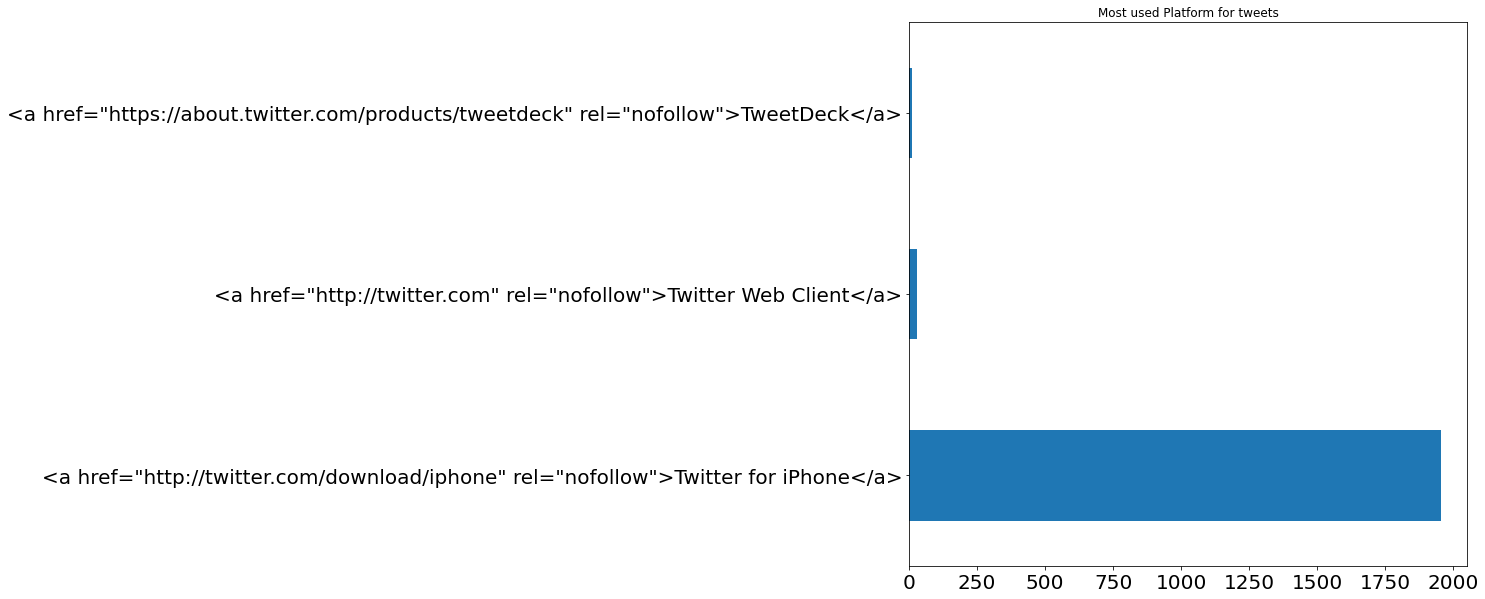

In [44]:
master_twitter_archive.source.value_counts().plot(kind='barh',
                                                  figsize=(10, 10),
                                                  title='Most used Platform for tweets',
                                                 fontsize=20);

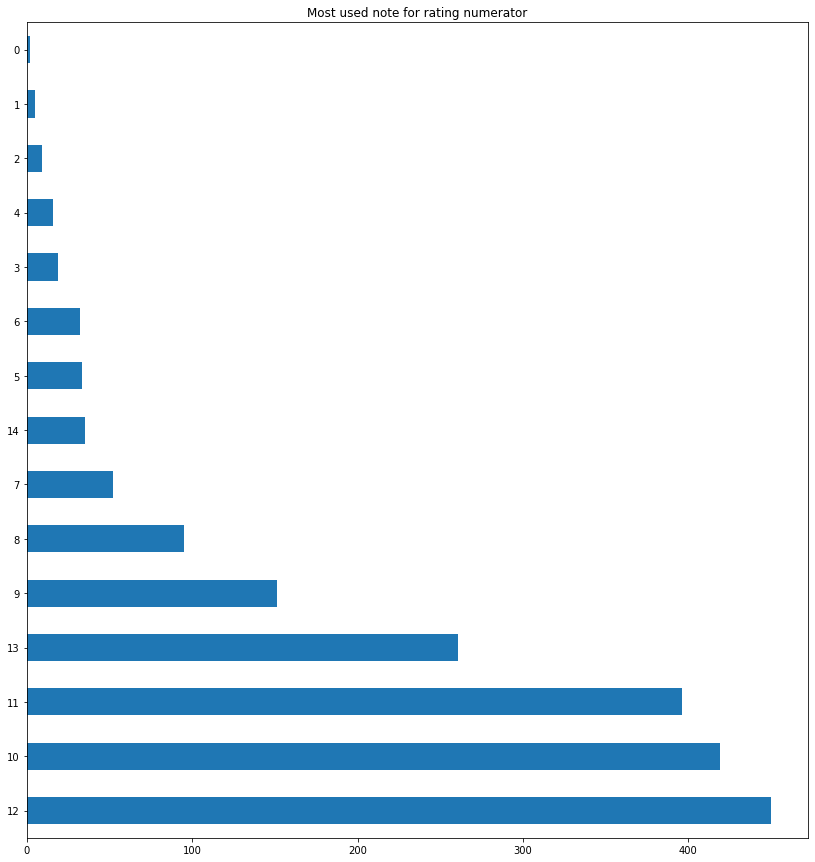

In [45]:
master_twitter_archive.rating_numerator.value_counts().nlargest(15).plot(kind='barh',
                                                                         figsize=(14, 15),
                                                                         title='Most used note for rating numerator');

The most used rating numerator note is `12`.

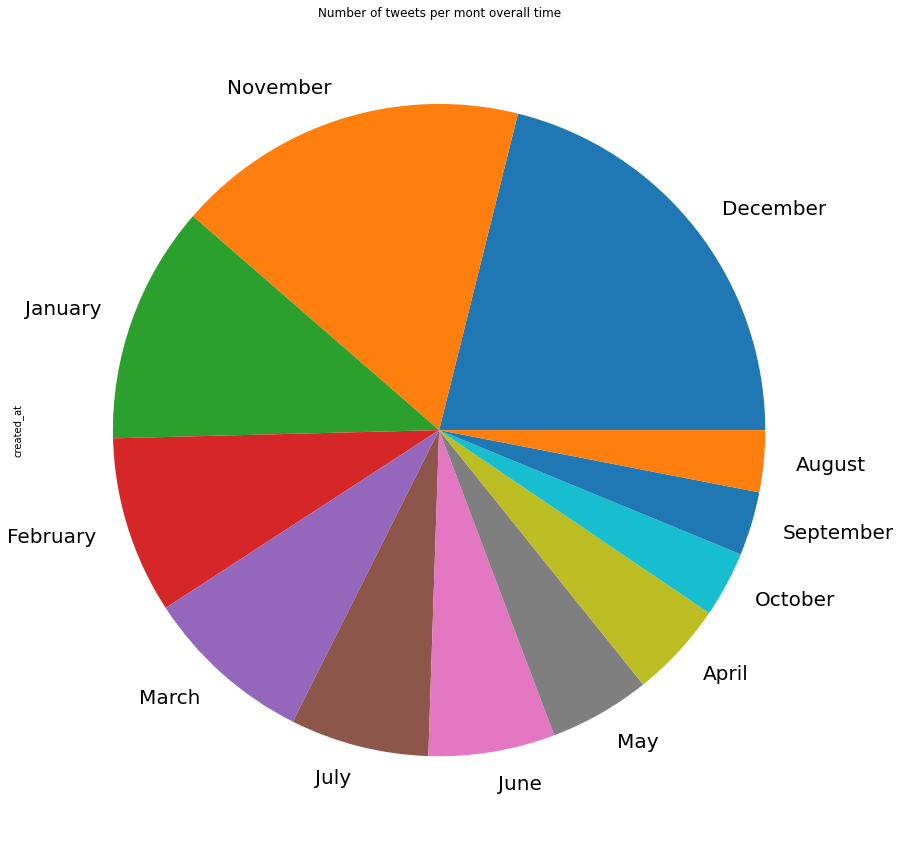

In [46]:
master_twitter_archive.created_at.dt.month_name().value_counts().plot(kind='pie',
                                                                     figsize=(15, 15),
                                                                     title='Number of tweets per mont overall time',
                                                                     fontsize=20);

Most of the tweets have been made in `December`, `November` and `January`.

In [47]:
master_twitter_archive[['retweet_count', 'favorite_count']].corr()

,retweet_count,favorite_count
retweet_count,1.000000,0.912947
favorite_count,0.912947,1.000000


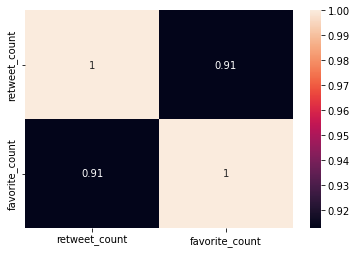

In [48]:
sns.heatmap(data=master_twitter_archive[['retweet_count', 'favorite_count']].corr(),
           annot=True);

There is a high correlation between `retweet_count` and `favorite_count`